In [1]:
import pandas as pd
df = pd.read_csv('/content/Fish.csv')
df

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...,...
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672


In [2]:
df.shape

(159, 7)

In [3]:
df.size #Total number of elements in dataframe

1113

In [4]:
df.info() #It gives the complete information about the dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


In [5]:
#to check the null values officially
df.isnull().sum()

Species    0
Weight     0
Length1    0
Length2    0
Length3    0
Height     0
Width      0
dtype: int64

In [6]:
#I want to find out the exact count of unique elements in each and every column
df.nunique()

Species      7
Weight     101
Length1    116
Length2     93
Length3    124
Height     154
Width      152
dtype: int64

<Axes: xlabel='Species', ylabel='count'>

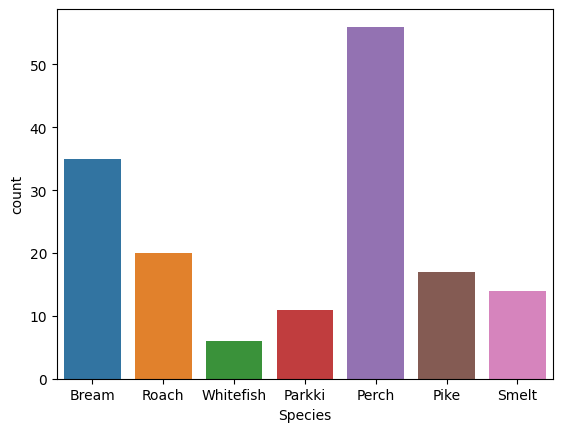

In [7]:
#VISUALISATION - SEABORN
import seaborn as sns #import the library
sns.countplot(x = 'Species',data = df)

In [8]:
#I want the exact count of species
df['Species'].value_counts()

Perch        56
Bream        35
Roach        20
Pike         17
Smelt        14
Parkki       11
Whitefish     6
Name: Species, dtype: int64

In [9]:
df['Species'].describe()

count       159
unique        7
top       Perch
freq         56
Name: Species, dtype: object

<Axes: xlabel='Length1', ylabel='Length3'>

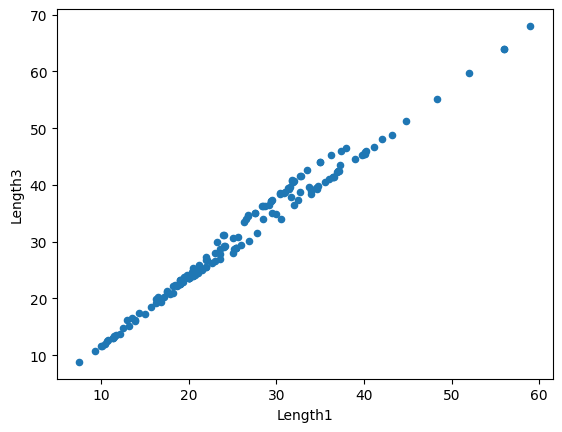

In [10]:
df.plot(x='Length1', y='Length3', kind='scatter')

<Axes: xlabel='Length1', ylabel='Length2'>

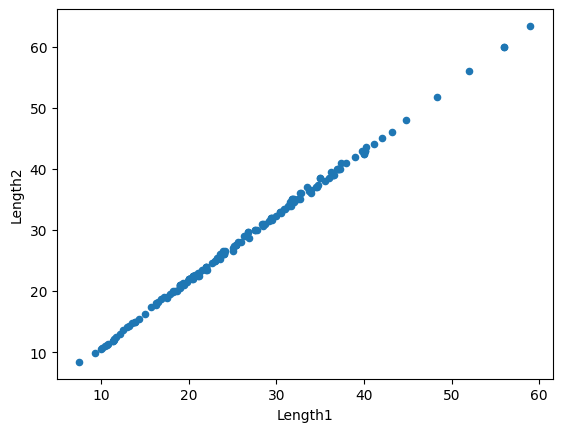

In [11]:
df.plot(x='Length1', y='Length2', kind='scatter')

<Axes: xlabel='Length2', ylabel='Length3'>

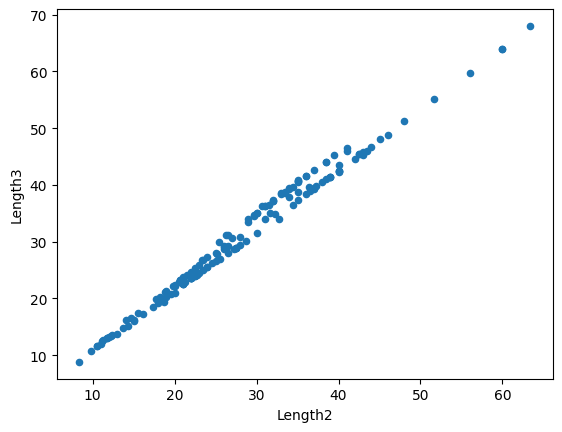

In [12]:
df.plot(x='Length2', y='Length3', kind='scatter')

In [13]:
#This function can be used to compute pairwise correlation of columns, excluding NA/null values.
df.corr()

<ipython-input-13-c27ebe668f6b>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Weight,Length1,Length2,Length3,Height,Width
Weight,1.000000,0.915712,0.918618,0.923044,0.724345,0.886507
Length1,0.915712,1.000000,0.999517,0.992031,0.625378,0.867050
Length2,0.918618,0.999517,1.000000,0.994103,0.640441,0.873547
Length3,0.923044,0.992031,0.994103,1.000000,0.703409,0.878520
Height,0.724345,0.625378,0.640441,0.703409,1.000000,0.792881
Width,0.886507,0.867050,0.873547,0.878520,0.792881,1.000000


In [14]:
#This function can be used to create pivot tables, which are useful for summarizing data and identifying patterns in the data.
pivot = df.pivot_table(index = ['Species'], values=['Height'], aggfunc ='sum')
pivot

,Height
Species,
Bream,531.4124
Parkki,98.5867
Perch,440.2647
Pike,131.1341
Roach,133.8959
Smelt,30.9312
Whitefish,60.1630


In [15]:
#This function can be used to create pivot tables, which are useful for summarizing data and identifying patterns in the data.
pivot = df.pivot_table(index = ['Species'], values=['Height'], aggfunc =['sum','median','min'])
pivot

,sum,median,min
,Height,Height,Height
Species,,,
Bream,531.4124,14.9544,11.5200
Parkki,98.5867,8.8928,6.5772
Perch,440.2647,6.9218,2.1120
Pike,131.1341,7.2900,5.5680
Roach,133.8959,6.5126,4.1472
Smelt,30.9312,2.2002,1.7284
Whitefish,60.1630,9.7610,8.1454


In [16]:
#Return those species whose value is between the given range of height
df.query('6 > Height > 5 and Weight > 200')

,Species,Weight,Length1,Length2,Length3,Height,Width
129,Pike,300.0,31.7,34.0,37.8,5.7078,4.1580
130,Pike,300.0,32.7,35.0,38.8,5.9364,4.3844
